In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator

In [10]:
working_dir = "./"
rna_004_1 = "../Exemplar_Data/identity_statistics/07_27_23_RNA004_GM12878_polyA_RNA_sup_8mods_polyA.GRCh38.sorted.calmd.filtered.chr2_112157000_114000000_read_stats.txt"
rna_004_091 = "../Exemplar_Data/identity_statistics/07_27_23_RNA004_GM12878_polyA_RNA.dorado_0.8.1_sup.moves.psi.GRCh38.calmd.filtered.chr2_112157000_114000000_read_stats.txt"
rna_002_2021 = "../Exemplar_Data/identity_statistics/nbt_data_6.3.2_hac.pass.NoU.hg38.sorted.calmd.filtered.chr2_112157000_114000000_read_stats.txt"
rna_002_2019 = "../Exemplar_Data/identity_statistics/NA12878-DirectRNA.pass.dedup.NoU.fastq.hg38.minimap2.sorted.calmd.filtered.chr2_112157000_114000000_read_stats.txt"

rna004_df = pd.read_csv(rna_004_091, sep='\t')
rna004_df["Align_Length"] = rna004_df["Align_Length"] - rna004_df["intron_skip"]
rna004_df = rna004_df[rna004_df["Align_Length"] >=200]

rna002_df = pd.read_csv(rna_002_2021, sep = "\t")
rna002_df["Align_Length"] = rna002_df["Align_Length"] - rna002_df["intron_skip"]
rna002_df = rna002_df[rna002_df["Align_Length"] >=200]
print(f"Median alignment identity is {np.median(np.array(rna002_df['Identity'].to_list()))} for RNA002")

rna002_2019_df = pd.read_csv(rna_002_2019, sep = "\t")
rna002_2019_df["Align_Length"] = rna002_2019_df["Align_Length"] - rna002_2019_df["intron_skip"]
rna002_2019_df = rna002_2019_df[rna002_2019_df["Align_Length"] >=200]

rna004_083_df = pd.read_csv(rna_004_1, sep = "\t")
rna004_083_df["Align_Length"] = rna004_083_df["Align_Length"] - rna004_083_df["intron_skip"]
rna004_083_df = rna004_083_df[rna004_083_df["Align_Length"] >=200]
print(f"Median alignment identity is {np.median(np.array(rna004_083_df['Identity'].to_list()))} for RNA004")

Median alignment identity is 0.8977230918456084 for RNA002
Median alignment identity is 0.9829803201806673 for RNA004


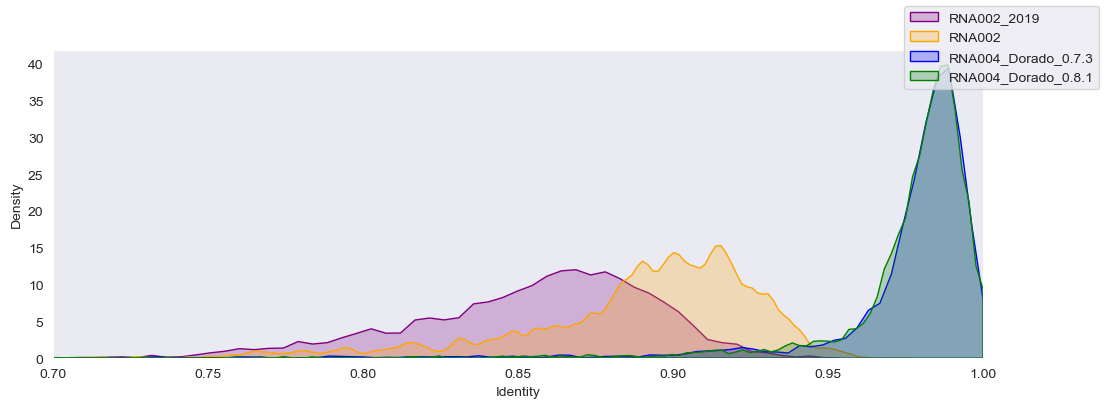

In [11]:
sns.set_style('dark')
fig, ax = plt.subplots(1)
fig.set_figwidth(12)
fig.set_figheight(4)
sns.kdeplot(data = rna002_2019_df, x = "Identity", fill = True, color = 'purple', ax = ax, label = 'RNA002_2019', clip=[0, 1.0], bw_adjust=0.2)
sns.kdeplot(data = rna002_df, x = "Identity", fill = True, color='orange', ax = ax, label = 'RNA002', clip=[0, 1.0], bw_adjust=0.2)
sns.kdeplot(data = rna004_df, x = "Identity", fill = True, color = 'blue', ax = ax, label = 'RNA004_Dorado_0.7.3', clip=[0, 1.0], bw_adjust=0.2)
sns.kdeplot(data = rna004_083_df, x = "Identity", fill = True, color = 'green', ax = ax, label = 'RNA004_Dorado_0.8.1', clip=[0, 1.0], bw_adjust=0.2)
ax.set_xlim([0.7, 1.00])
ax.grid(False)
fig.legend()
fig.get_figure().savefig(os.path.join(working_dir, "RNA002_vs_RNA004_Identity_KDE.pdf"))

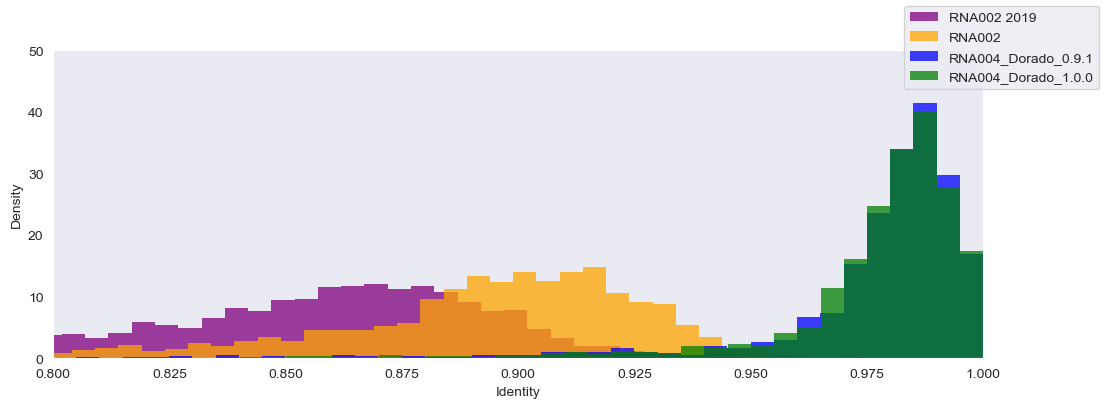

In [12]:
sns.set_style('dark')
fig, ax = plt.subplots(1)
fig.set_figwidth(12)
fig.set_figheight(4)
sns.histplot(data = rna002_2019_df, x = "Identity", fill = True, color='purple', ax = ax, label = 'RNA002 2019',stat = 'density', binwidth=0.005, edgecolor='orange', linewidth=0)
sns.histplot(data = rna002_df, x = "Identity", fill = True, color='orange', ax = ax, label = 'RNA002',stat = 'density', binwidth=0.005, edgecolor='orange', linewidth=0)
sns.histplot(data = rna004_df, x = "Identity", fill = True, color='blue', ax = ax, label = 'RNA004_Dorado_0.9.1', stat = 'density', binwidth=0.005, edgecolor='blue', linewidth=0)
sns.histplot(data = rna004_083_df, x = "Identity", fill = True, color='green', ax = ax, label = 'RNA004_Dorado_1.0.0', stat = 'density', binwidth=0.005, edgecolor='green', linewidth=0)
ax.grid(False)
ax.set_xlim([0.8, 1.00])
ax.set_ylim([0, 50])
fig.legend()
fig.get_figure().savefig(os.path.join(working_dir,"RNA002_vs_RNA004_0.8.1_Identity_Histplot.pdf"))

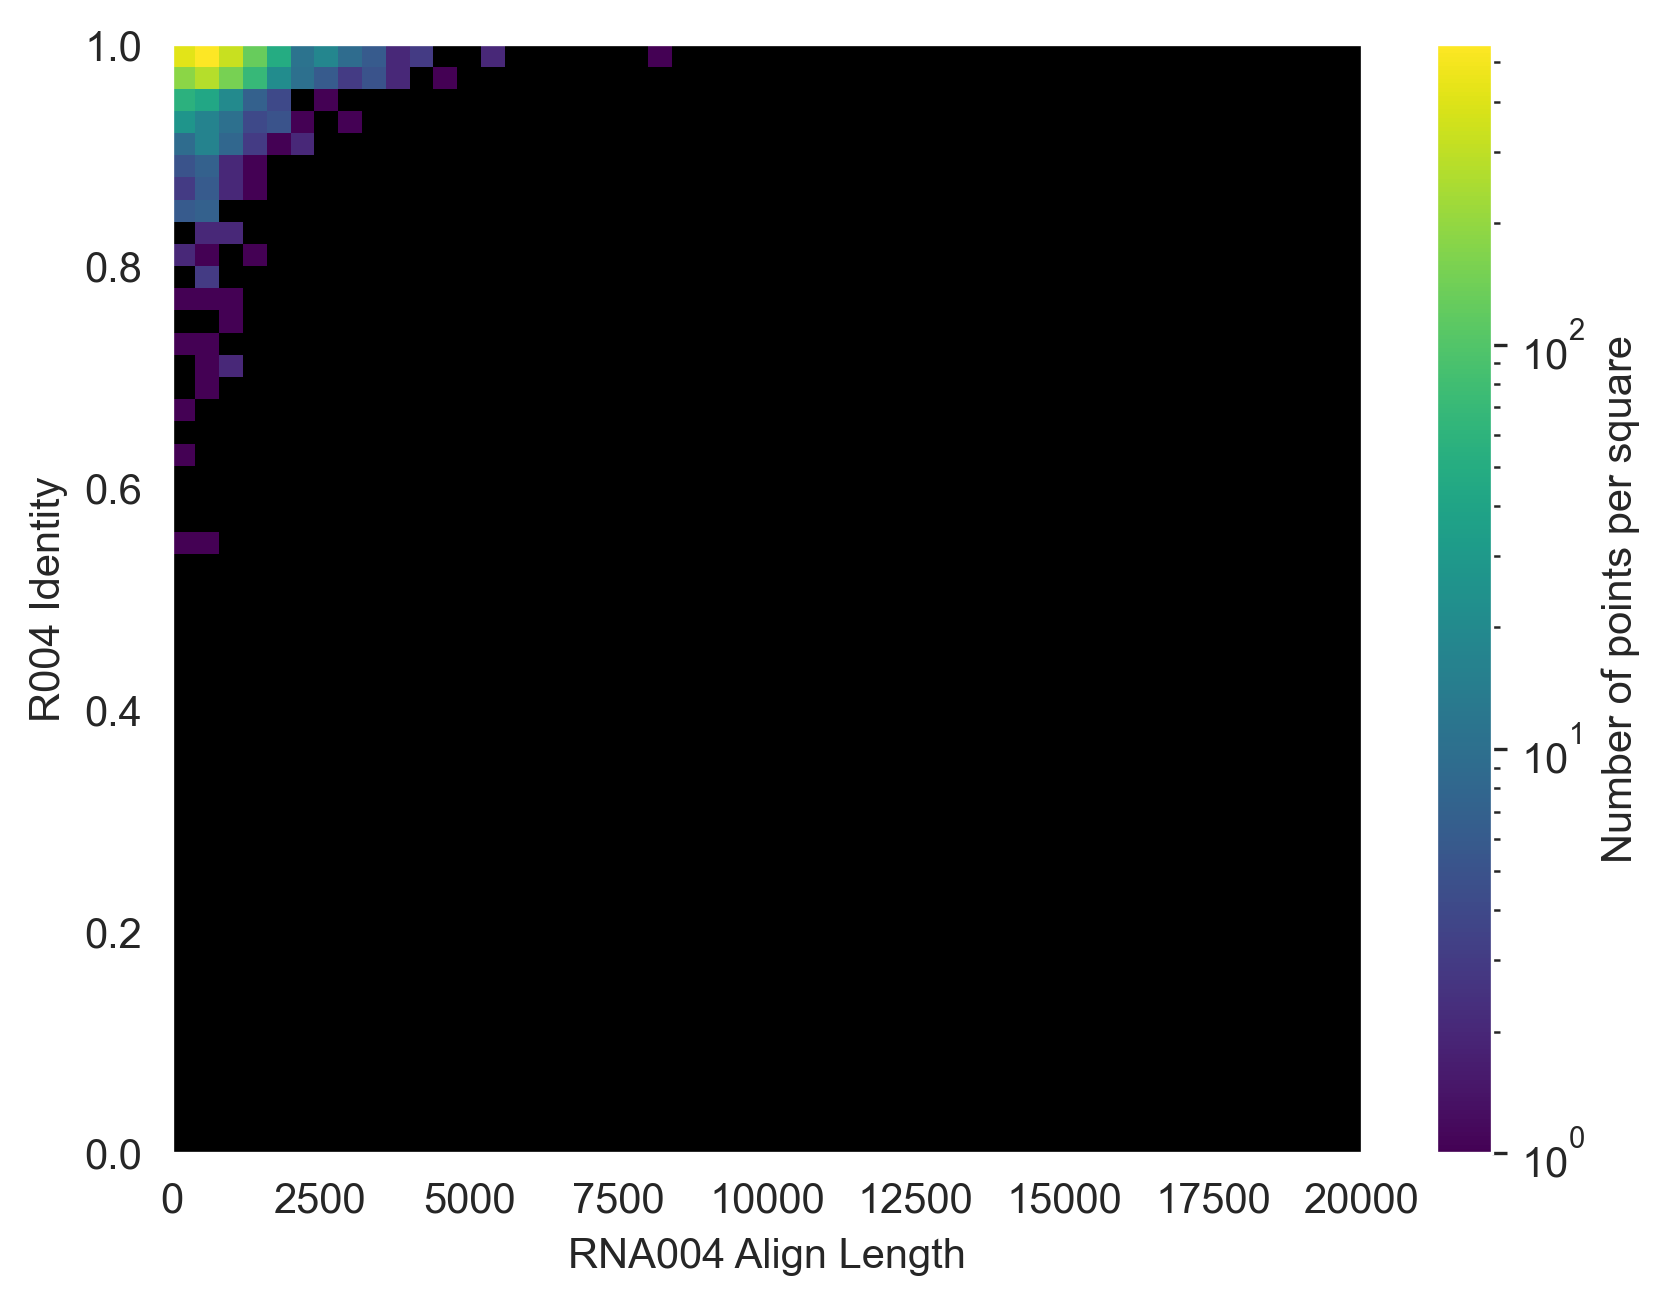

In [13]:
fig = plt.figure(dpi = 300)
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')
tmp_rna004_083_df = rna004_083_df[rna004_083_df["Align_Length"] < 20000]
density = ax.hist2d(x = tmp_rna004_083_df['Align_Length'].to_list(), 
                    y = tmp_rna004_083_df['Identity'].to_list(), 
                    cmap='viridis', 
                    norm=colors.LogNorm(), 
                    bins=50,
                    range=[[0,20000],[0, 1]])
fig.colorbar(density[3], label='Number of points per square')
ax.grid(False)
plt.xlabel('RNA004 Align Length')
plt.ylabel('R004 Identity')
fig.get_figure().savefig(os.path.join(working_dir,"RNA004_083_2dhist_Align_Len_vs_Identity.pdf"))

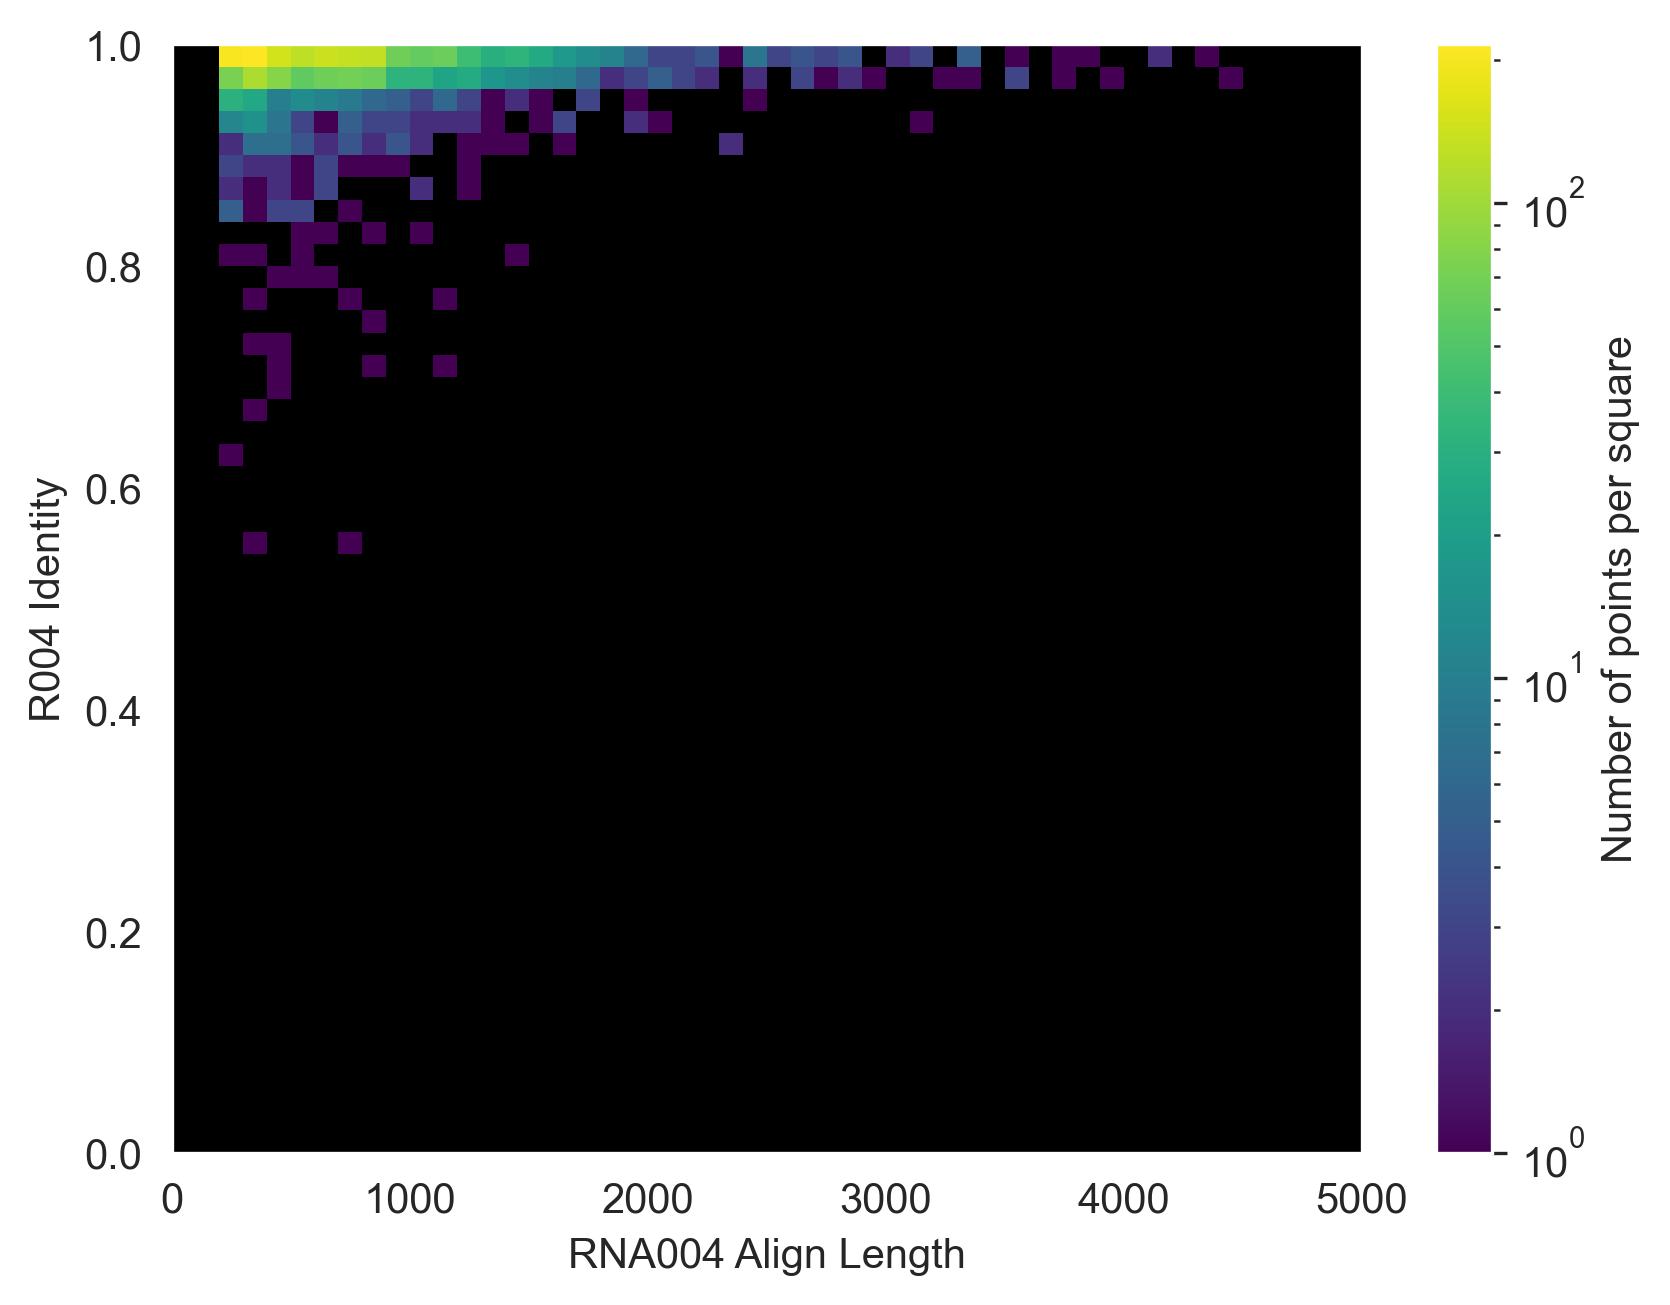

In [14]:
fig = plt.figure(dpi = 300)
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')
tmp_rna004_083_df = rna004_083_df[rna004_083_df["Align_Length"] < 50000]
density = ax.hist2d(x = tmp_rna004_083_df['Align_Length'].to_list(), 
                    y = tmp_rna004_083_df['Identity'].to_list(), 
                    cmap='viridis', 
                    norm=colors.LogNorm(), 
                    bins=50,
                    range=[[0,5000],[0, 1]])
fig.colorbar(density[3], label='Number of points per square')
ax.grid(False)
plt.xlabel('RNA004 Align Length')
plt.ylabel('R004 Identity')
fig.get_figure().savefig(os.path.join(working_dir,"RNA004_083_2dhist_Align_Len_vs_Identity_5kb.pdf"))

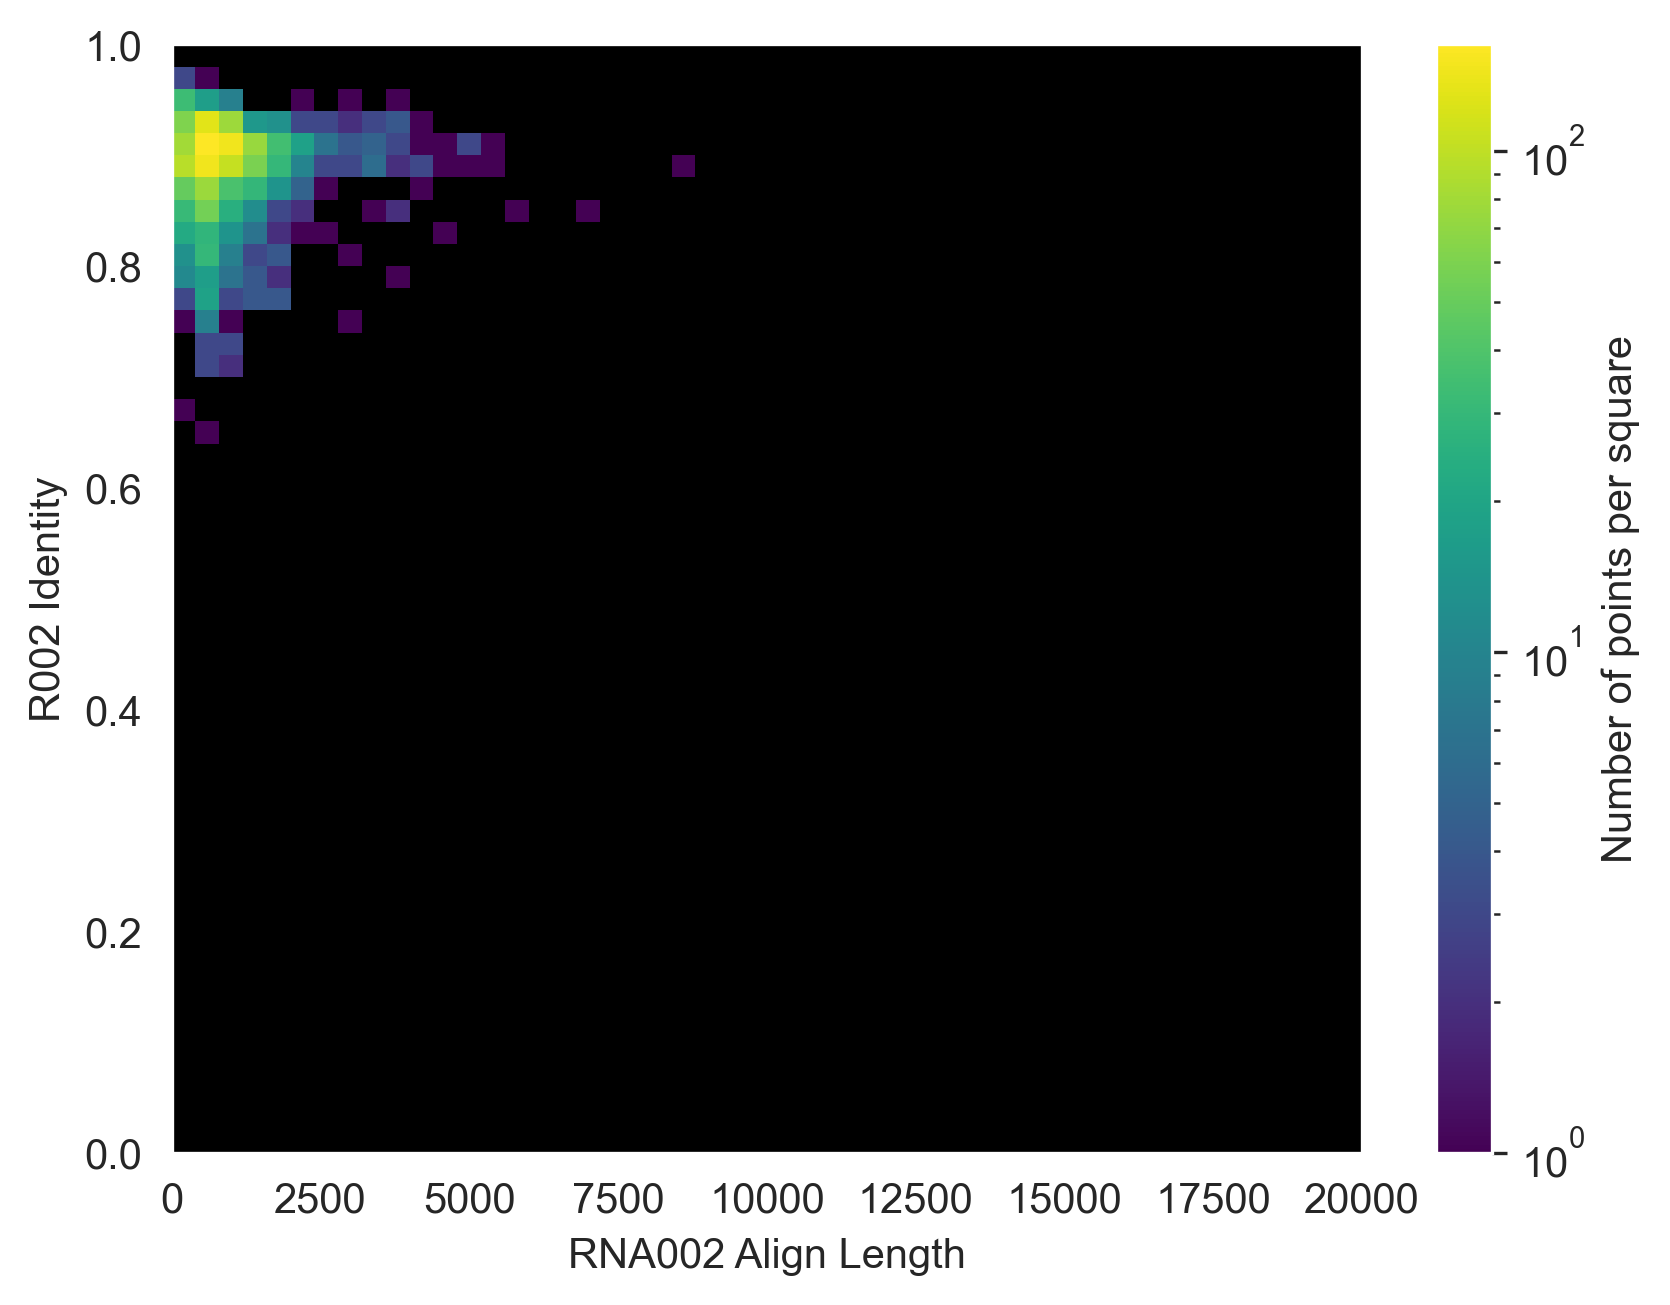

In [15]:
fig = plt.figure(dpi = 300)
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')
density = ax.hist2d(x = rna002_df['Align_Length'].to_list(), 
                    y = rna002_df['Identity'].to_list(), 
                    cmap='viridis',
                    norm=colors.LogNorm(), 
                    bins=50,
                    range=[[0,20000],[0, 1]]
                   )
fig.colorbar(density[3], label='Number of points per square')
ax.grid(False)
plt.xlabel('RNA002 Align Length')
plt.ylabel('R002 Identity')
fig.get_figure().savefig(os.path.join(working_dir,"RNA002_2dhist_Align_Len_vs_Identity.pdf"))

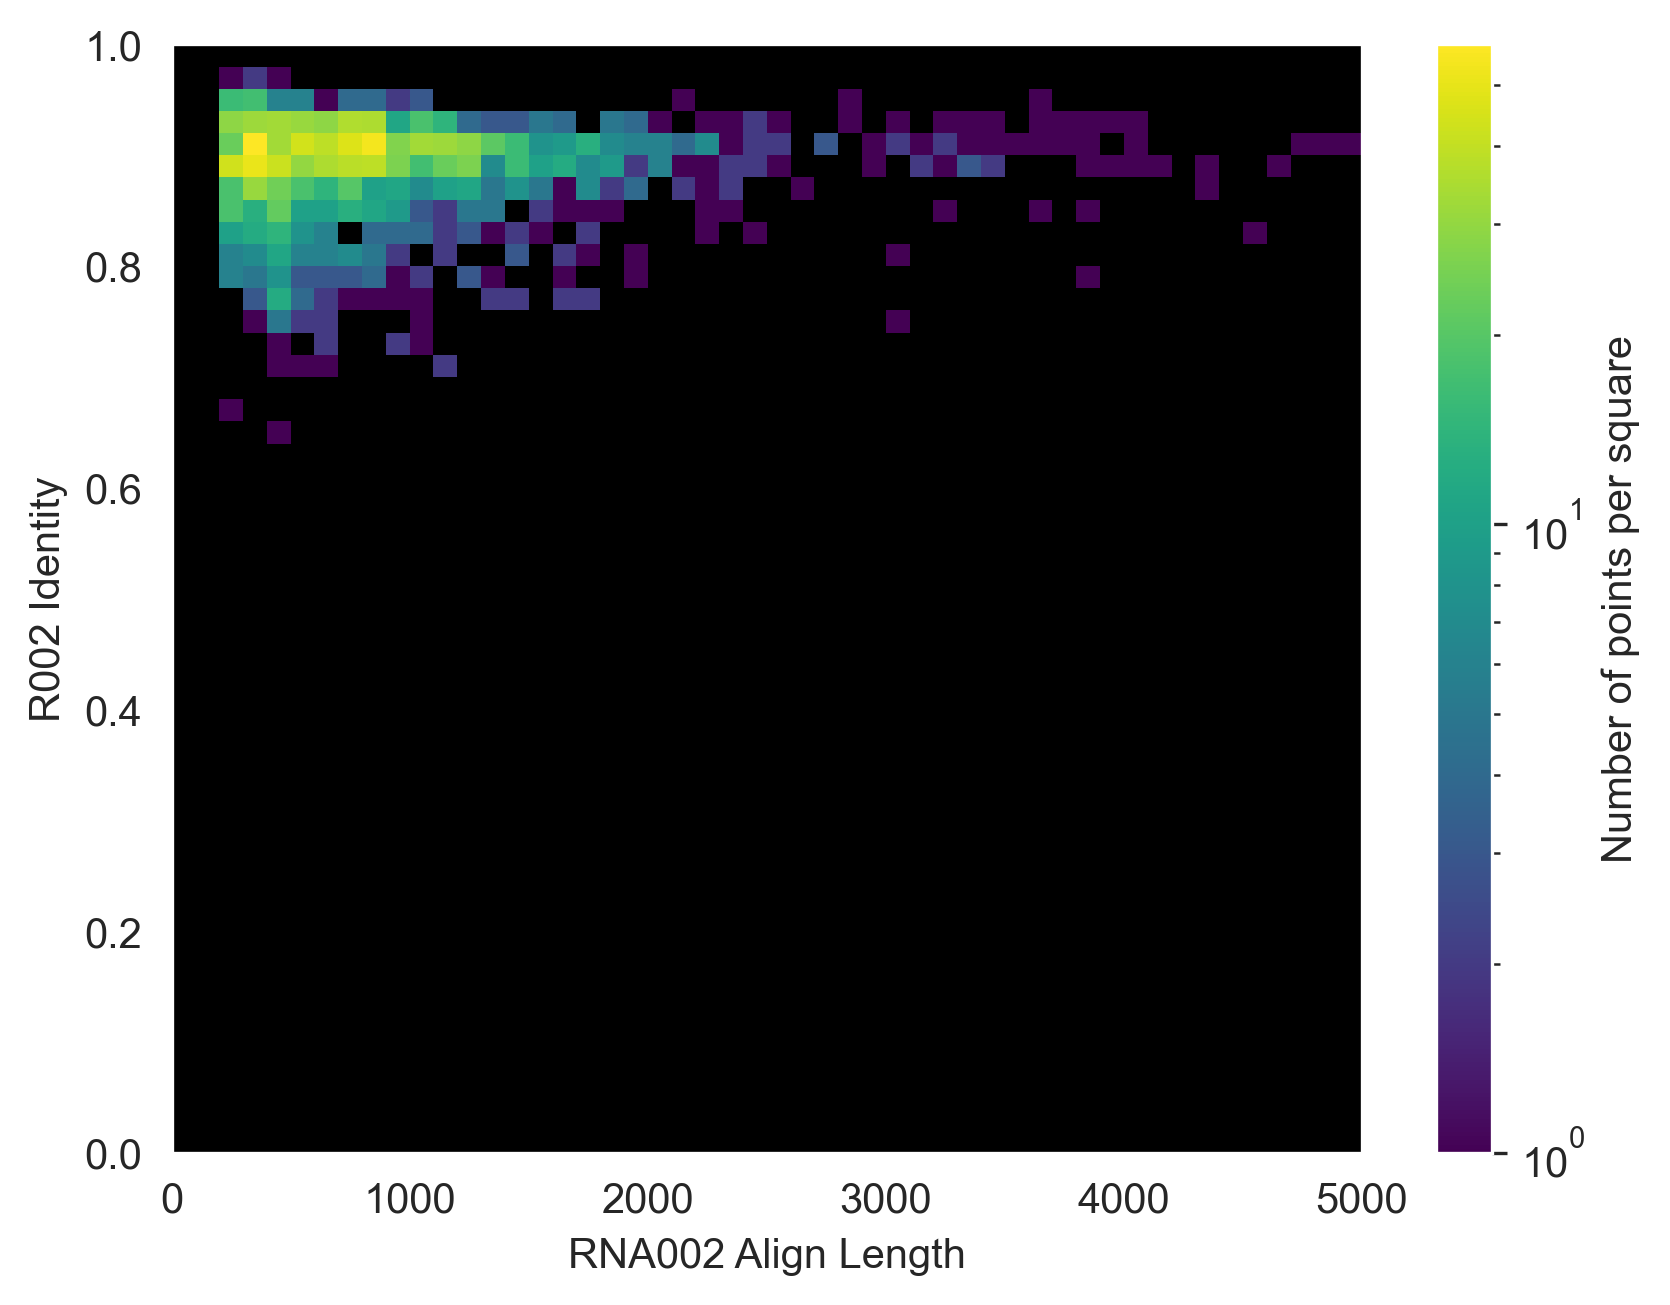

In [16]:
fig = plt.figure(dpi = 300)
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')
tmp_rna002_df = rna002_df[rna002_df['Align_Length'] <= 5000]
density = ax.hist2d(x = tmp_rna002_df['Align_Length'].to_list(), 
                    y = tmp_rna002_df['Identity'].to_list(), 
                    cmap='viridis',
                    norm=colors.LogNorm(), 
                    bins=50,
                    range=[[0,5000],[0, 1]]
                   )
fig.colorbar(density[3], label='Number of points per square')
ax.grid(False)
plt.xlabel('RNA002 Align Length')
plt.ylabel('R002 Identity')
fig.get_figure().savefig(os.path.join(working_dir,"RNA002_2dhist_Align_Len_vs_Identity_5kb.pdf"))

In [17]:
rna002_df_mean_median = [np.mean(rna002_df["Identity"].to_list()), 
                     np.median(rna002_df["Identity"].to_list())]
rna004_df_mean_median = [np.mean(rna004_df["Identity"].to_list()), 
                     np.median(rna004_df["Identity"].to_list())]
rna002_2019_df_mean_median = [np.mean(rna002_2019_df["Identity"].to_list()), 
                          np.median(rna002_2019_df["Identity"].to_list())]
rna004_083_df_mean_median = [np.mean(rna004_083_df["Identity"].to_list()), 
                        np.median(rna004_083_df["Identity"].to_list())]

print(f"RNA002 2019: Mean={rna002_2019_df_mean_median[0]}, Median={rna002_2019_df_mean_median[1]}")
print(f"RNA002 2021: Mean={rna002_df_mean_median[0]}, Median={rna002_df_mean_median[1]}")
print(f"RNA004 0.7.3: Mean={rna004_df_mean_median[0]}, Median={rna004_df_mean_median[1]}")
print(f"RNA004 0.8.1: Mean={rna004_083_df_mean_median[0]}, Median={rna004_083_df_mean_median[1]}")

RNA002 2019: Mean=0.8531225182159222, Median=0.8606376033657333
RNA002 2021: Mean=0.888185157884157, Median=0.8977230918456084
RNA004 0.7.3: Mean=0.9716353650392098, Median=0.9834204072928883
RNA004 0.8.1: Mean=0.9754070862396521, Median=0.9829803201806673
